<a href="https://colab.research.google.com/github/Naomie25/DI-Bootcamp/blob/main/Week5_Day5_ExerciceXP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

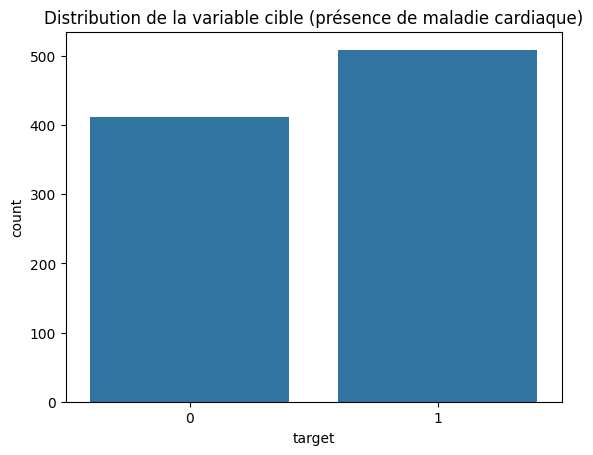

Accuracy: 0.821
Precision: 0.811
Recall: 0.882
F1 Score: 0.845


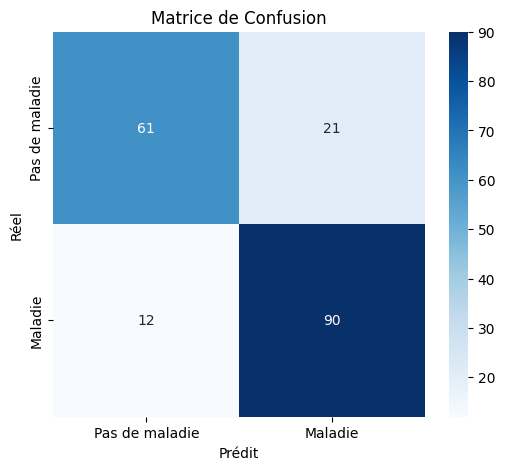

              precision    recall  f1-score   support

           0       0.84      0.74      0.79        82
           1       0.81      0.88      0.85       102

    accuracy                           0.82       184
   macro avg       0.82      0.81      0.82       184
weighted avg       0.82      0.82      0.82       184



In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    confusion_matrix, classification_report
)

# Charger le dataset
url = "/content/heart_disease_uci.csv"
df = pd.read_csv(url)

# Conversion de la variable cible en binaire : 0 = pas de maladie, 1 = maladie présente
df['target'] = df['num'].apply(lambda x: 0 if x == 0 else 1)

# Visualiser la distribution de la cible binaire
sns.countplot(x='target', data=df)
plt.title("Distribution de la variable cible (présence de maladie cardiaque)")
plt.show()

# Sélection des variables explicatives (on retire 'id', 'num' et la nouvelle 'target')
X = df.drop(['id', 'num', 'target'], axis=1)

# Certaines colonnes sont catégorielles, on va les encoder (ex: 'sex', 'dataset', 'cp', etc.)
# Pour simplifier, utilisons get_dummies pour toutes les colonnes de type object
X = pd.get_dummies(X, drop_first=True)

# La cible binaire
y = df['target']

# Remplir les valeurs manquantes par la moyenne (pour les colonnes numériques)
X = X.fillna(X.mean())

# Standardiser les variables
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Séparer en train/test
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)

# Entraîner le modèle
model = LogisticRegression(random_state=42)
model.fit(X_train, y_train)

# Prédictions
y_pred = model.predict(X_test)

# Évaluation
print(f"Accuracy: {accuracy_score(y_test, y_pred):.3f}")
print(f"Precision: {precision_score(y_test, y_pred):.3f}")
print(f"Recall: {recall_score(y_test, y_pred):.3f}")
print(f"F1 Score: {f1_score(y_test, y_pred):.3f}")

# Matrice de confusion
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=['Pas de maladie', 'Maladie'],
            yticklabels=['Pas de maladie', 'Maladie'])
plt.xlabel('Prédit')
plt.ylabel('Réel')
plt.title('Matrice de Confusion')
plt.show()

# Rapport complet
print(classification_report(y_test, y_pred))
